# Bank Churn Prediction 
it is much more expensive to sign in a new client than keeping an existing one. It is advantageous for banks to know what leads a client towards the decision to leave the company. Churn prevention allows companies to develop loyalty programs and retention campaigns to 
keep as many customers as possible. I explored the following classification techniques and compared the accuracy and other metrics such as AUC score.
Models Explored:
1. Logistic Regression 
2. XG Boost

All steps:
1. Data preprocessing : to check any missing values, correlated variable, and dummy encoding
2. EDA:  to develop hypothesis
3. Scaling data : it helps to improve accuracy 
4. Splitting data into data train and data test
6. Testing the accuracy on test data and plotting AUC
7. Comparing each model  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick #for specifying the axes tick formatt
import seaborn as sns
sns.set (style = 'white')

In [2]:
data = pd.read_csv('bank_dataset.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# About dataset:

RowNumber: corresponds to the record (row) number and has no effect on the output.

CustomerId :contains random values and has no effect on customer leaving the bank.

Surname: the surname of a customer has no impact on their decision to leave the bank.

CreditScore : can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography :a customer’s location can affect their decision to leave the bank.

Gender : it’s interesting to explore whether gender plays a role in a customer leaving the bank.

Age : this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

Tenure : refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

Balance : also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts: refers to the number of products that a customer has purchased through the bank.

HasCrCard: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

IsActiveMember : active customers are less likely to leave the bank.

EstimatedSalary : as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

Exited : whether or not the customer left the bank.

Acknowledgements
As we know, it is much more expensive to sign in a new client than keeping an existing one.
It is advantageous for banks to know what leads a client towards the decision to leave the company.
Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.isna().any(axis=0).any()
data.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Observation result:
1. From the information above, data has no missing value. Every variable column has 10000 datarows.
2. The mean of CreditScore of bank customers is 650.528800
3. The mean of Tenure of bank customers is 5.012800
4. The mean of NumOfProducts that customers purchased is 1.530200
5. Variable Exited data type integer, it must be boolean, so varible Exited need to change to be boolean.

In [7]:
data['Exited'] = data['Exited'].astype('bool')

In [8]:
#remove customer id and row number 
data_2 = data.iloc[:,3:]
data_2.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,True
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,True
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False


In [9]:
#convert all categorical variables into dummy variables
data_dummies = pd.get_dummies(data_2)
data_dummies.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,False,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,True,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,False,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,False,0,0,1,1,0


In [10]:
#get correlation of churn with other variables:
data_corr = data_dummies.corr()

In [11]:
data_corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780,0.002857,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685,0.027544,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868,-0.014733,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892,-0.012087,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039,0.021859,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480,-0.005766,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732,-0.022544,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482,0.008112,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667,0.106512,-0.106512
Geography_France,-0.008928,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,-0.104955,1.000000,-0.580359,-0.575418,-0.006772,0.006772


<AxesSubplot:>

<Figure size 864x720 with 0 Axes>

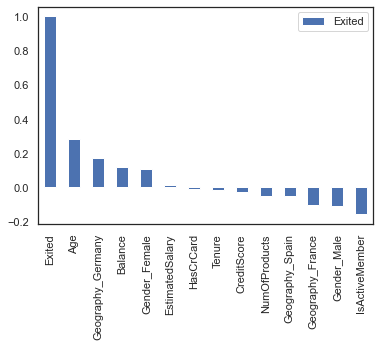

In [12]:
plt.figure(figsize = (12,10))
data_corr[['Exited']].sort_values(by='Exited', ascending = False).plot(kind='bar')

#### Observastion result
Based on correlation bar plot, we can conclude that:

Age, Geography_Germany to be positively correlated with Exited. While IsActiveMember, Gender_Male is negatively correlated with Exited 

That's quite interesting that IsActiveMember is negatively correlated with Exited.

We need to more explore with the dataset!

# Data Exploration
data exploration helps to understand the patterns in the data and potentially form some hypothesis.
### A).Demographic  
Understanding variable Age, Gender, Geography, and IsActiveMember, NumOfProducts 

#### 1. Gender Distribution

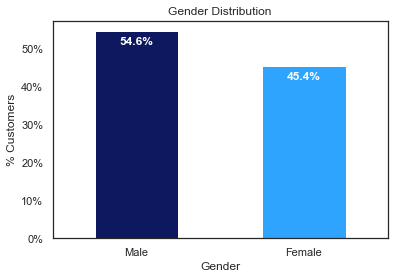

In [13]:
colors = ['#0E185F','#2FA4FF']
ax = (data_2['Gender'].value_counts()*100.0/len(data_2)).plot(kind='bar', stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

#create a list to collect the plt.patches data
total = []

#find the values and append to list
for i in ax.patches:
    total.append(i.get_width())

#set individual bar labels using above list
totals = sum(total)

for i in ax.patches:
    #get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
           str(round((i.get_height()/totals), 1))+ '%',
           fontsize=12,
           color = 'white',
           weight = 'bold')


From the graphic above, we can conclude that the most customers are male

#### 2. Geography Distribution 

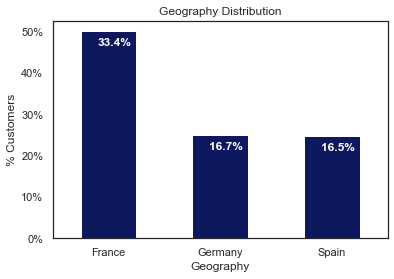

In [14]:
colors = ['#0E185F']
ax = (data_2['Geography'].value_counts()*100.0/len(data_2)).plot(kind='bar', stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Geography')
ax.set_ylabel('% Customers')
ax.set_title('Geography Distribution')

#create a list to collect the plt.patches data
total = []

#find the values and append to list
for i in ax.patches:
    total.append(i.get_width())

#set individual bar labels using above list
totals = sum(total)

for i in ax.patches:
    #get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
           str(round((i.get_height()/totals), 1))+ '%',
           fontsize=12,
           color = 'white',
           weight = 'bold')


From the graphic above the most customers are from France

#### 3. Active Member Distribution

Text(0.5, 1.0, '% of Customer')

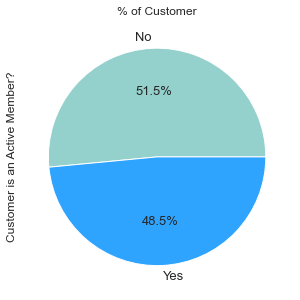

In [15]:
colors = ['#95D1CC','#2FA4FF']
ax = (data_2['IsActiveMember'].value_counts()*100.0/len(data_2))\
.plot.pie(autopct = '%.1f%%', labels = ['No', 'Yes'], colors = colors, figsize =(5,5),fontsize = 13 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Customer is an Active Member?', fontsize = 12) 
ax.set_title('% of Customer', fontsize = 12)

From the graphic above, we can conclude that unactive members is much more than active members

#### 4. Has Credit Card

Text(0.5, 1.0, '% of Customer')

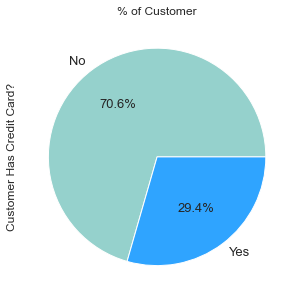

In [16]:
colors = ['#95D1CC','#2FA4FF']
ax = (data_2['HasCrCard'].value_counts()*100.0/len(data_2))\
.plot.pie(autopct = '%.1f%%', labels = ['No', 'Yes'], colors = colors, figsize =(5,5),fontsize = 13 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Customer Has Credit Card?', fontsize = 12) 
ax.set_title('% of Customer', fontsize = 12)

From the graphic above, we can conclude the most of the bank's customers has not credit card

#### 5. Age Distribution 

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customes by Their Age')

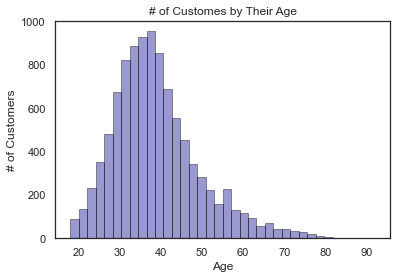

In [17]:
ax = sns.distplot(data_2['Age'], hist = True, kde = False,
                 bins = int(180/5), color = 'darkblue',
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_title('Age (year)')
ax.set_title('# of Customes by Their Age')


#### 5. Number of Product Purchased by Customers Distribution

Text(0.5, 1.0, 'Number of Products that Purchased by Customers')

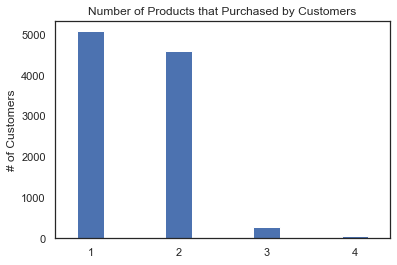

In [18]:
ax = data_2['NumOfProducts'].value_counts().plot(kind = 'bar', rot = 0, width = 0.3) 
ax.set_ylabel('# of Customers')
ax.set_title('Number of Products that Purchased by Customers')

### B) Exited Rate

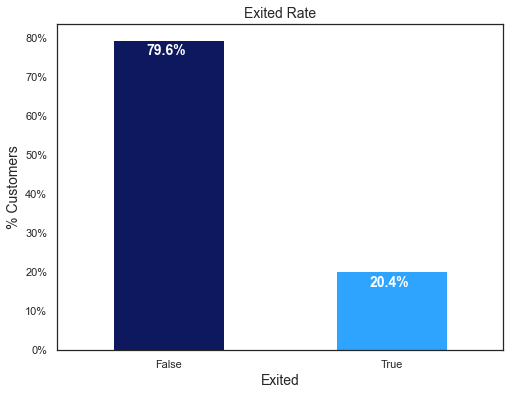

In [19]:
colors = ['#0E185F','#2FA4FF']
ax = (data['Exited'].value_counts()*100.0/len(data)).plot(kind = 'bar',
                                                         stacked = True,
                                                         rot = 0,
                                                         color = colors,
                                                         figsize = (8,6)
                                                         )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size = 14)
ax.set_xlabel('Exited', size = 14)
ax.set_title('Exited Rate', size = 14)

#create a list to collerct the plt.patches data
total = []

#find the values and append to list
for i in ax.patches:
    total.append(i.get_width())
#set individual bar labels using above list 
totals = sum(total)

for i in ax.patches:
    #get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0,\
            str(round((i.get_height()/totals), 1))+ '%',
           fontsize = 12, 
           color = 'white',
           weight = 'bold',
           size = 14)

from the graphic above we can conclude that 79.6% of customers do not exited. Clearly the data as we expected a large majority of the customers to not exited. 

Now we explore exited rate by tenure, credit score, age, balance, hascrcard, isactive member, 
and estimated salary.

### C) Explore Exited Rate

#### 1.  Exited rate by Tenure

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

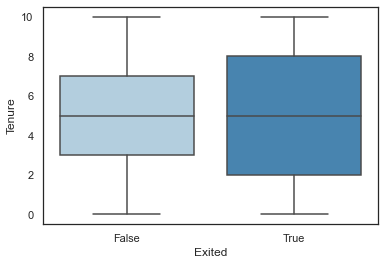

In [20]:
sns.boxplot(x = data_2.Exited, y = data_2.Tenure, palette="Blues")

#### 2.Exited rate by Credit Score 

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

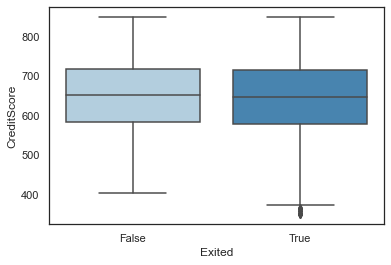

In [21]:
sns.boxplot(x = data_2.Exited, y = data_2.CreditScore, palette="Blues")

#### 3. Exited Rate by Age

<AxesSubplot:xlabel='Exited', ylabel='Age'>

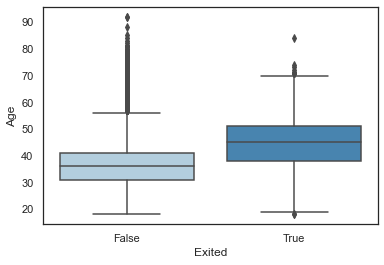

In [22]:
sns.boxplot(x = data_2.Exited , y = data_2.Age, palette = "Blues")

#### 4. Exited Rate by Balance

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

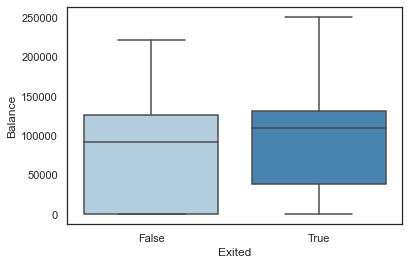

In [23]:
sns.boxplot(x = data_2.Exited, y = data_2.Balance, palette ="Blues")

#### 5. Exited Rate by HasCrCard

<AxesSubplot:xlabel='Exited', ylabel='HasCrCard'>

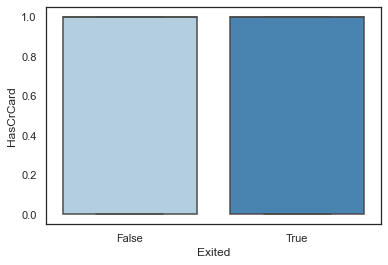

In [24]:
sns.boxplot(x = data_2.Exited, y = data_2.HasCrCard, palette = "Blues")

#### 6. Exited Rate By IsActiveMember

<AxesSubplot:xlabel='Exited', ylabel='IsActiveMember'>

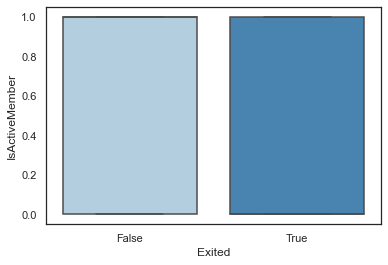

In [25]:
sns.boxplot(x = data_2.Exited, y = data_2.IsActiveMember, palette = "Blues")

# Observation result
As we can see from the box plot above (1-6)
We can conclude that:

a) The variables that impactful to customer to be exited are : 

    1. Tenure
    2. Credit Score
    3. Balance
    4. HasCrCard
    5. IsActiveMember
    
b) The most significant variable that impact to Exited Rate is Tenure

c) Variables HasCrCard and IsActiveMember has equal results of Exited Rate

# Scaling Data

In [26]:
dummy_variable = ['Gender', 'Geography','Exited']

to_transform = ['Age','Tenure','CreditScore','Balance', 'NumOfProducts','IsActiveMember','EstimatedSalary','HasCrCard']

dummy_data_file_index = 0

In [27]:
from sklearn.preprocessing import StandardScaler
def get_dummy_data_with_output(dummy_variable, data_2):
    global dummy_data_file_index
    dummy_data = pd.get_dummies(data_2, prefix = dummy_variable, columns = dummy_variable, drop_first = True)
    dummy_data.to_csv('dummy_var_data'+str(dummy_data_file_index)+'.csv', index=False)
    y = dummy_data['Exited_True']
    dummy_data.drop(columns=['Exited_True'], inplace=True)
    sc = StandardScaler()
    dummy_data.loc[:,to_transform] = sc.fit_transform(dummy_data.loc[:, to_transform])
    dummy_data_file_index += 1
    return y, dummy_data
y, dummy_data = get_dummy_data_with_output(dummy_variable, data_2)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import statsmodels.api as sm
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [29]:
X_train, X_test, y_train, y_test = train_test_split(dummy_data, y, test_size = 0.3)

# Logistic Regression Modelling 

In [30]:
def get_sm_model(y_train, X_train, X_test):
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    logit_model = sm.Logit(y_train,X_train)
    model = logit_model.fit()
    print(model.summary())
    y_hat = list(map(round, model.predict(X_test)))
    arr = np.c_[y_hat, y_test]
    print('n\Printing predicted and actual values:\n',arr)
    print('Confusion Matrix \n', confusion_matrix(y_test,y_hat))
    print('Accuracy Score: ', accuracy_score(y_test, y_hat))
    return model, arr
    

In [31]:
def get_sk_model(y_train, X_train, X_test):
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train, y_train)
    arr = np.c_[X_train.columns.tolist(), model.coef_[0]]
    intercept  = model.intercept_[0]
    print('\nPrinting model coefficients and intercept summary:\n ', arr, model.intercept_)
    y_pred = model.predict (X_test)
    print('n\Printing predicted and actual values from sklearn:\n', np.c_[y_pred,y_test])
    print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))
    plt.matshow(confusion_matrix(y_test, y_pred))
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b=None)
    plt.show()
    print('Accuracy Scores:\n', accuracy_score(y_test, y_pred))
    print('Classification Report: \n', classification_report(y_test, y_pred))
    return model, arr, intercept

In [32]:
from sklearn.metrics import roc_curve 
def roc(model, X_test, y_test):
    probs = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, probs[:,1])
    plt.plot(fpr, tpr, marker='.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    print('AUC: %.3f' % roc_auc_score(y_test, probs[:,1]))

In [33]:
get_sm_model(y_train, X_train, X_test);

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Exited_True   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6988
Method:                           MLE   Df Model:                           11
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:                     inf
Time:                        14:59:59   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.5202      0.059    -25.644      0.000      -1.636      -1.404
CreditScore  

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '



Printing model coefficients and intercept summary:
  [['CreditScore' '-0.06063343372179094']
 ['Age' '0.760643551152028']
 ['Tenure' '-0.060072329457952774']
 ['Balance' '0.20181136345411432']
 ['NumOfProducts' '-0.06185303718879999']
 ['HasCrCard' '-0.03856166997971133']
 ['IsActiveMember' '-0.5170584747274728']
 ['EstimatedSalary' '0.009173393993503145']
 ['Gender_Male' '-0.5785570826493849']
 ['Geography_Germany' '0.7266782291734835']
 ['Geography_Spain' '-0.010482839239945922']] [-1.51909891]
n\Printing predicted and actual values from sklearn:
 [[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]
Confusion Matrix
 [[2309   83]
 [ 480  128]]


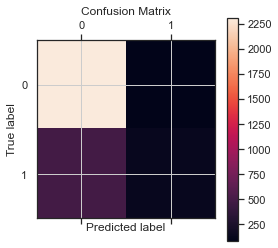

Accuracy Scores:
 0.8123333333333334
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      2392
           1       0.61      0.21      0.31       608

    accuracy                           0.81      3000
   macro avg       0.72      0.59      0.60      3000
weighted avg       0.78      0.81      0.77      3000



In [34]:
model, arr, intercept = get_sk_model(y_train, X_train, X_test);

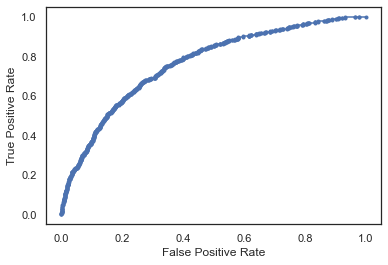

AUC: 0.763


In [35]:
roc(model, X_test, y_test)

In [37]:
from xgboost import XGBClassifier

In [38]:
def get_sk_modelxgb(y_train, X_train, X_test):
    xg = XGBClassifier()
    xg.fit(X_train, y_train)
    arr = np.c_[X_train.columns.tolist(), model.coef_[0]]
    intercept  = model.intercept_[0]
    print('\nPrinting model coefficients and intercept summary:\n ', arr, model.intercept_)
    y_pred = xg.predict (X_test)
    print('n\Printing predicted and actual values from sklearn:\n', np.c_[y_pred,y_test])
    print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))
    plt.matshow(confusion_matrix(y_test, y_pred))
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b=None)
    plt.show()
    print('Accuracy Scores:\n', accuracy_score(y_test, y_pred))
    print('Classification Report: \n', classification_report(y_test, y_pred))
    return model, arr, intercept

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:41:44] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Printing model coefficients and intercept summary:
  [['CreditScore' '-0.06063343372179094']
 ['Age' '0.760643551152028']
 ['Tenure' '-0.060072329457952774']
 ['Balance' '0.20181136345411432']
 ['NumOfProducts' '-0.06185303718879999']
 ['HasCrCard' '-0.03856166997971133']
 ['IsActiveMember' '-0.5170584747274728']
 ['EstimatedSalary' '0.009173393993503145']
 ['Gender_Male' '-0.5785570826493849']
 ['Geography_Germany' '0.7266782291734835']
 ['Geography_Spain' '-0.010482839239945922']] [-1.51909891]
n\Printing predicted and actual values from sklearn:
 [[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]
Confusion Matrix
 [[2272  120]
 [ 309  299]]


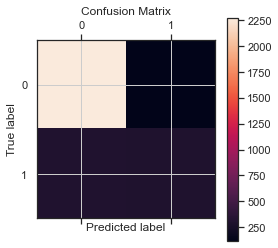

Accuracy Scores:
 0.857
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      2392
           1       0.71      0.49      0.58       608

    accuracy                           0.86      3000
   macro avg       0.80      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [39]:
model, arr, intercept = get_sk_modelxgb(y_train, X_train, X_test);

[15:41:46] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


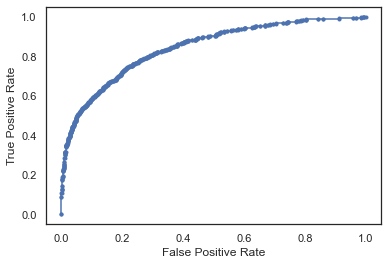

AUC: 0.843


In [40]:
def roc2(model, X_test, y_test):
    xg = XGBClassifier()
    xg.fit(X_train, y_train)
    probs = xg.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, probs[:,1])
    plt.plot(fpr, tpr, marker='.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    print('AUC: %.3f' % roc_auc_score(y_test, probs[:,1]))
roc2(model, X_test, y_test)